###  ADDIS ABABA UNIVERSITY 
    
###  ADDIS ABABA INSTITUTE OF TECHNOLOGY
    
####  SCHOOL OF INFORMATION TECHNOLOGY AND ENGINEERING – SITE
    
####  Department of MSC in Artificial Intelligence                                           



### Course Assignment       `Assignment 1`
>>###### Course:  Reinforcement Learning
>>###### Name:    Mintesnot Fikir
>>###### Section: Regular 
>>###### IDs:   GSR1669/15   
>>###### Submitted to: Natnael A. (PhD)
>>###### Submission date Nov 2023

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Question 1: 
Implement the value iteration algorithm to find the optimal policy for a fully observable environment represented as an MDP. Consider a grid world environment where the agent can move in four directions: up, down, left, and right. The grid world is represented as a 5x5 grid, and each cell has a reward value associated with it. The agent receives a reward of +10 for reaching the goal state and a reward of -1 for every other step. The discount factor (gamma) is set to 0.9. Write the code to perform value iteration and print the optimal policy for each state after convergence.


## Solution



This assignment implements the value iteration algorithm to find the optimal policy for a fully observable environment modeled as a Markov Decision Process (MDP). The environment is a grid world, where an agent can move in four directions: up, down, left, and right. The grid is a 5x5 matrix, with the agent's objective to reach a specific state while maximizing rewards. The agent is given a reward of +10 for reaching the goal state, and a penalty of -1 is incurred for every other step. The task is to calculate the optimal policy that guides the agent to the goal with the maximum total reward, considering a discount factor (gamma) of 0.9.



C:\Users\minte\AppData\Local\Temp\ipykernel_1008\2979904427.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens', 100)


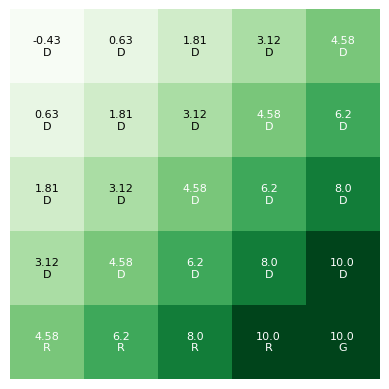

In [4]:
class GridWorldWithIntensity(object):
    """
    GridWorldWithIntensity class represents a grid world environment for an MDP.
    It uses value iteration to find the optimal policy in a fully observable environment.
    """
    def __init__(self, grid_size, goal_state):
        """
        Initializes the grid world environment.

        Parameters:
        grid_size (tuple): Size of the grid as (rows, columns).
        goal_state (tuple): Coordinates of the goal state as (row, column).
        """
        self.step_reward = -1  # Reward for each step taken.
        self.goal_reward = 10  # Reward for reaching the goal state.
        self.gamma = 0.9       # Discount factor.
        self.grid_size = grid_size
        self.goal_state = goal_state
        self.n_rows, self.n_cols = grid_size

        # State space and action space definitions.
        self.state_space = list(range(self.n_rows * self.n_cols))
        self.action_space = {'Up': -self.n_cols, 'Down': self.n_cols, 'Left': -1, 'Right': 1}
        self.actions = ['Up', 'Down', 'Left', 'Right']

        # Initialize value and policy matrices.
        self.V = np.zeros((self.n_rows, self.n_cols))
        self.policy = np.full((self.n_rows, self.n_cols), ' ')

    def iterate_values(self, theta=0.0001):
        """
        Performs value iteration algorithm to find the optimal policy.

        Parameters:
        theta (float): A small threshold determining the accuracy of the estimation.
        """
        converged = False
        while not converged:
            delta = 0
            for i in range(self.n_rows):
                for j in range(self.n_cols):
                    if (i, j) == self.goal_state:
                        continue

                    v = self.V[i, j]
                    values = []

                    # Evaluate each possible action from the current state.
                    for action in self.actions:
                        ni, nj = i, j
                        if action == 'Up' and i > 0: ni -= 1
                        elif action == 'Down' and i < self.n_rows - 1: ni += 1
                        elif action == 'Left' and j > 0: nj -= 1
                        elif action == 'Right' and j < self.n_cols - 1: nj += 1

                        # Calculate reward for the new state.
                        new_state_reward = self.goal_reward if (ni, nj) == self.goal_state else self.step_reward
                        values.append(new_state_reward + self.gamma * self.V[ni, nj])

                    max_value = max(values)
                    self.V[i, j] = max_value
                    self.policy[i, j] = self.actions[values.index(max_value)]
                    delta = max(delta, abs(v - max_value))

            # Check for convergence.
            if delta < theta:
                converged = True

        # Set the value and policy for the goal state.
        self.V[self.goal_state] = self.goal_reward
        self.policy[self.goal_state] = 'Goal'

    def print_values_and_policy(self):
        """
        Prints the values and policies on the grid world with color intensity.
        Darker green indicates higher values, representing proximity to the goal state.
        """
        cmap = plt.cm.get_cmap('Greens', 100)  
        norm = plt.Normalize(self.V.min(), self.V.max())
        rgba = cmap(norm(self.V))

        fig, ax = plt.subplots()
        im = ax.imshow(rgba, interpolation='nearest')

        # Display values and policies on the grid.
        for i in range(self.V.shape[0]):
            for j in range(self.V.shape[1]):
                c = 'w' if self.V[i, j] > 4 else 'k'
                text = ax.text(j, i, f'{np.round(self.V[i, j], 2)}\n{self.policy[i, j]}', 
                               ha="center", va="center", color=c, fontsize=8)

        plt.axis('off')
        plt.show()

# Grid world parameters
grid_size = (5, 5)
goal_state = (4, 4)

# Create GridWorldWithIntensity instance
env = GridWorldWithIntensity(grid_size, goal_state)

# Perform value iteration to find optimal values and policy
env.iterate_values()

# Display both values and policies in the same cell
env.print_values_and_policy()


### Algorithm Implementation and Value Calculation

The `GridWorldWithIntensity` class is created to represent the grid world environment. It initializes the grid with specified dimensions and the goal state, setting up essential parameters like step reward, goal reward, and the discount factor. The state and action spaces are defined, and value (`V`) and policy matrices are initialized.

The `iterate_values` method in the class implements the value iteration algorithm. It iteratively updates the value of each state based on the expected utility of each action, adjusted for rewards and the discount factor. The algorithm continues until the value changes between iterations are below a small threshold (theta), ensuring convergence.

In each iteration, every non-goal state's value is calculated for each possible action (up, down, left, right). The state's value is updated to the maximum of these values. This step includes both the immediate reward and the discounted value of the next state. The policy for each state is simultaneously determined as the action that yields this maximum value.

### Visualization Representation

Once the algorithm converges to the optimal values and policy, the `print_values_and_policy` method is used for visualization. This method displays the grid world, with each cell showing its value and the corresponding action of the optimal policy. The cells are color-coded in shades of green, with darker shades indicating higher values, symbolizing proximity to the goal state. This visual representation helps understand the value distribution across the grid and the direction of the optimal policy at each point.




#### `Conclusion` 
The value iteration algorithm implemented here successfully finds the optimal policy for the given grid world MDP. The derived policy efficiently guides the agent to the goal state, maximizing the cumulative reward. This example demonstrates the effectiveness of dynamic programming in solving sequential decision-making problems under uncertainty. The visualization of the value function and policy across the grid provides a clear insight into the decision-making process at each state, confirming the optimality of the derived policy.


>>>>
>>
>>
>>
>>
>>>>

# Question 2:
Implement a basic Q-learning algorithm for a simple grid world environment. The grid
world consists of a 5x5 grid where an agent can move in four directions: up, down, left,
and right. The agent receives a reward of +10 for reaching the goal state and a reward
of -1 for every other step. The agent's Q-table should be initialized with zeros, and the
learning rate (alpha) and discount factor (gamma) should be set as 0.5 and 0.9,
respectively. Write the code to perform Q-learning for a fixed number of episodes, and
print the learned Q-values after training.

### Solution
Here is bellow code implements a Q-learning algorithm for a 5x5 grid world environment, a classic reinforcement learning problem. the approach that i have followed is, an agent navigates through a grid to reach a designated goal state. The agent can move in four directions: up, down, left, and right. It receives a reward of +10 upon reaching the goal and -1 for each step taken in other states.

The objective is to learn an optimal policy that maximizes the cumulative reward, guiding the agent efficiently to the goal. The algorithm initializes a Q-table with zero values and updates it based on the rewards received and estimated future rewards. The Q-learning algorithm, a form of model-free reinforcement learning, iteratively improves its policy by exploring the environment and exploiting known information. The code is annotated with detailed comments in each section to explain the purpose and functionality of the various components, including the environment setup, Q-table update mechanism, action selection process, training loop, and visualization of the learned Q-values.

The final visualization highlights the goal state in black and uses color intensity to represent the Q-values, providing an intuitive understanding of the learned policy's effectiveness across the grid. the explanations of each steps of the code provided in the code, written as a comment.

C:\Users\minte\AppData\Local\Temp\ipykernel_13960\1188344072.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens')


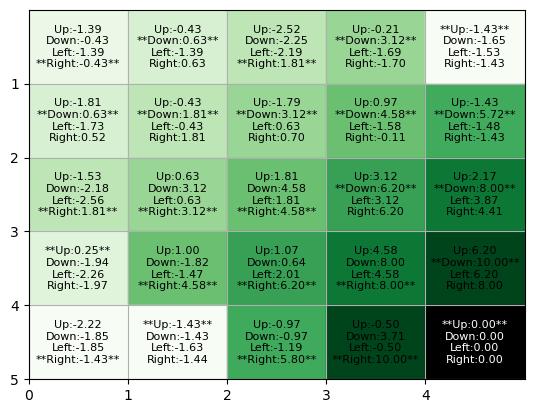

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
class GridWorldQLearning:
    
    # Constructor for the GridWorldQLearning class
    def __init__(self, grid_size, goal_state, alpha=0.5, gamma=0.9):
        
        
        # Set the size of the grid, the goal state, and the learning parameters
        self.grid_size = grid_size  # Dimensions of the grid
        self.goal_state = goal_state  # Coordinates of the goal state in the grid
        self.alpha = alpha  # Learning rate for Q-learning
        self.gamma = gamma  # Discount factor for future rewards

        # Calculate the number of states and actions
        self.n_rows, self.n_cols = grid_size  # Extract rows and columns
        self.n_states = self.n_rows * self.n_cols  # Total states in the grid
        self.n_actions = 4  # Total possible actions (up, down, left, right)

        # Initialize Q-table with zeros for each state-action pair
        self.q_table = np.zeros((self.n_states, self.n_actions))

    # Convert a 2D state to a 1D state index
    def state_to_index(self, state):
        return state[0] * self.n_cols + state[1]

    # Calculate the next state given the current state and action
    def get_next_state(self, state, action):
        next_state = list(state)
        
        
        # Apply the action and ensure it's within grid bounds
        if action == 0 and state[0] > 0: next_state[0] -= 1  # Move up
        elif action == 1 and state[0] < self.n_rows - 1: next_state[0] += 1  # Move down
        elif action == 2 and state[1] > 0: next_state[1] -= 1  # Move left
        elif action == 3 and state[1] < self.n_cols - 1: next_state[1] += 1  # Move right
        return tuple(next_state)

    # Define the reward mechanism
    def get_reward(self, state):
        
        
        # Reward of +10 for reaching the goal, -1 for other steps
        return 10 if state == self.goal_state else -1

    # Implement epsilon-greedy policy for action selection
    def choose_action(self, state, epsilon=0.1):
        
        
        # Random exploration vs. exploitation of the learned policy
        if random.uniform(0, 1) < epsilon:
            return random.choice(range(self.n_actions))  # Explore
        else:
            state_index = self.state_to_index(state)
            return np.argmax(self.q_table[state_index])  # Exploit

    # Update the Q-table based on the agent's experience
    def update_q_table(self, state, action, next_state, reward):
        
        
        # Calculate the Temporal Difference (TD) target and error
        state_index = self.state_to_index(state)
        next_state_index = self.state_to_index(next_state)
        best_next_action = np.argmax(self.q_table[next_state_index])

        td_target = reward + self.gamma * self.q_table[next_state_index][best_next_action]
        td_error = td_target - self.q_table[state_index][action]
        self.q_table[state_index][action] += self.alpha * td_error

    # Train the agent over multiple episodes
    def train(self, num_episodes=1000):
        for _ in range(num_episodes):
            
            state = (0, 0)  # Start at the beginning of the grid
            while state != self.goal_state:
                action = self.choose_action(state)
                next_state = self.get_next_state(state, action)
                reward = self.get_reward(next_state)
                self.update_q_table(state, action, next_state, reward)
                state = next_state
def plot_q_values_with_goal(env):
    max_q_values = np.max(env.q_table, axis=1).reshape(env.n_rows, env.n_cols)

    cmap = plt.cm.get_cmap('Greens')
    norm = plt.Normalize(vmin=np.min(max_q_values), vmax=np.max(max_q_values))

    fig, ax = plt.subplots()

    for i in range(env.n_rows):
        for j in range(env.n_cols):
            state_index = env.state_to_index((i, j))
            q_values = env.q_table[state_index]
            best_action = np.argmax(q_values)

            color = 'black' if (i, j) == env.goal_state else cmap(norm(max_q_values[i, j]))
            square = plt.Rectangle((j, env.n_rows - i - 1), 1, 1, color=color)
            ax.add_patch(square)

            text_color = 'white' if (i, j) == env.goal_state else 'black'
            
            # Bold the selected policy/action
            action_labels = ["Up", "Down", "Left", "Right"]
            formatted_text = [f"{action_labels[a]}:{q_values[a]:.2f}" if a != best_action else f"**{action_labels[a]}:{q_values[a]:.2f}**" for a in range(4)]
            display_text = "\n".join(formatted_text)

            text = ax.text(j + 0.5, env.n_rows - i - 0.5, display_text, 
                           ha="center", va="center", color=text_color, fontsize=8)

    ax.set_xlim(0, env.n_cols)
    ax.set_ylim(0, env.n_rows)
    ax.set_xticks(np.arange(0, env.n_cols, 1))
    ax.set_yticks(np.arange(0, env.n_rows, 1))
    ax.set_yticklabels(range(env.n_rows, 0, -1))
    ax.grid(which='both')

    plt.show()


# Grid world parameters
grid_size = (5, 5)
goal_state = (4, 4)

# Create a new instance of GridWorldQLearning
env = GridWorldQLearning(grid_size, goal_state)

# Train the agent
env.train()

# Plot the Q-values with the goal state colored in black
plot_q_values_with_goal(env)


The implementation of a Q-learning algorithm in a 5x5 grid world environment. The goal is to train an agent to navigate efficiently to a specified goal state, maximizing its cumulative reward. The agent can move in four directions: up, down, left, and right.

### Algorithm Implementation:
- The `GridWorldQLearning` class encapsulates the environment and the Q-learning algorithm. It initializes a Q-table with zero values, which represent the expected utility of performing certain actions in specific states.
- The agent updates the Q-table based on its experiences, which include state transitions and received rewards. The update is governed by the Bellman equation, with the learning rate (`alpha`) influencing the integration of new information and the discount factor (`gamma`) determining the importance of future rewards.
- During training, the agent explores the environment by selecting actions either randomly or based on the current Q-table. The Q-table is updated using the rewards obtained and the predicted future rewards. This process repeats across multiple episodes to converge to an optimal policy.

### Value Calculation:
- Q-values are calculated iteratively. Each Q-value represents the expected utility of taking a specific action in a given state, considering both current and future rewards.
- When the agent takes an action in a state, it receives an immediate reward and transitions to a new state. The Q-value for the state-action pair is updated to reflect the immediate reward plus the discounted maximum Q-value of the new state, indicating the best future strategy.

### Visualization and Representation:
- The `plot_q_values_with_goal` function visualizes the learned Q-values on the grid. Each cell in the grid corresponds to a state, with the color intensity indicating the highest Q-value among the possible actions. Darker shades of green denote higher Q-values, suggesting more favorable states for reaching the goal.
- The goal state is distinctly colored in black, visually differentiating it from other states and highlighting the agent's target.
- Inside each cell, the Q-values for all four actions (up, down, left, right) are displayed. The action with the highest Q-value in each state is bolded, emphasizing the agent's chosen policy.

`Conclusion`
implementation demonstrates how an agent can learn optimal decision-making in a structured environment, finding the most efficient path to a goal. The visual output aids in understanding the agent's learning process and the effectiveness of the Q-learning algorithm.
